<a href="https://colab.research.google.com/github/LucaIorio26/prova/blob/main/ESAME_ALGORITMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import export_graphviz

from sklearn.metrics import classification_report, confusion_matrix



In [47]:
df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()
df.isna().any()

df.isna().sum().plot(kind="bar")

In [ ]:
df.describe()

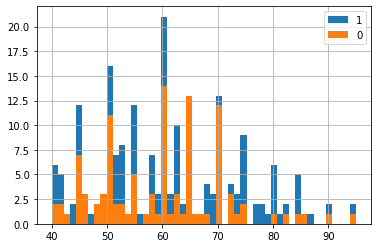

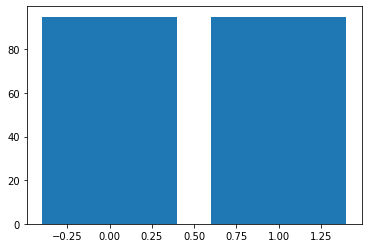

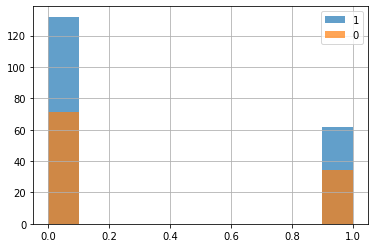

In [33]:
df[df['sex']==1]['age'].hist(bins=50)
df[df['sex']==0]['age'].hist(bins=50)
plt.legend(['1','0'])
plt.show()


plt.bar(x=df['sex'],height=df['age'])

plt.show()


df[df['sex']==1]['DEATH_EVENT'].hist(alpha=0.7)
df[df['sex']==0]['DEATH_EVENT'].hist(alpha=0.7)
plt.legend(['1','0'])
plt.show()


In [ ]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


In [ ]:
sns.pairplot(df,hue='DEATH_EVENT')


In [54]:
df_numerico = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_numerico[:] = scaler.fit_transform(df_numerico[:])


In [ ]:
df_numerico.describe()

df_model = df_numerico
df_model [['anaemia','diabetes','smoking','high_blood_pressure','sex','DEATH_EVENT']]= df[['anaemia','diabetes','smoking','high_blood_pressure','sex','DEATH_EVENT']]
df_model 

In [64]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_model[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]   # Features
y=df_model['DEATH_EVENT']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1234) # 70% training and 30% test

Text(0.5, 1.0, 'ACCURATEZZA 0.8222222222222222')

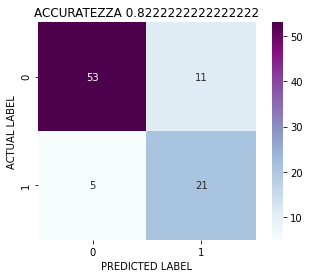

In [91]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


logistic = LogisticRegression()
logistic.fit(X_train,y_train)

predictions_logistic = logistic.predict(X_test)
score_logistic = logistic.score(X_test,y_test)
score_logistic

cm = confusion_matrix(y_test, predictions_logistic)
sns.heatmap(cm,annot=True,square=True,cmap='BuPu')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')
plt.title(f'ACCURATEZZA {score_logistic}')

Text(0.5, 1.0, 'ACCURATEZZA 0.8222222222222222')

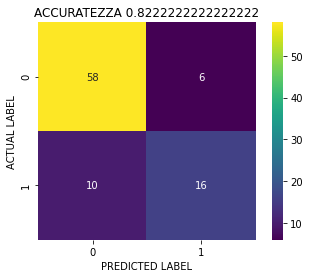

In [137]:
#RANDOM FOREST
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

XGBoost=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                   max_depth=1, random_state=0)

XGBoost.fit(X_train,y_train)
predictions_XGBoost = XGBoost.predict(X_test)
score_XGBoost = XGBoost.score(X_test,y_test)

cm = confusion_matrix(y_test, predictions_XGBoost)
sns.heatmap(cm,annot=True,square=True,cmap='viridis')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')
plt.title(f'ACCURATEZZA {score_XGBoost}')

Text(0.5, 1.0, 'ACCURATEZZA 0.8222222222222222')

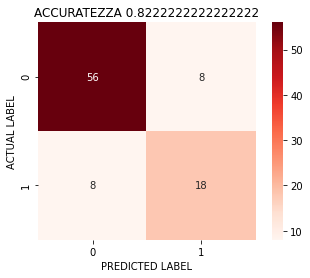

In [123]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

linear_svm = SVC()
linear_svm.fit(X_train,y_train)

predictions_svm = linear_svm.predict(X_test)
score_svm = linear_svm.score(X_test,y_test)
score_svm

cm = confusion_matrix(y_test, predictions_svm)
sns.heatmap(cm,annot=True,square=True,cmap='Reds')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')
plt.title(f'ACCURATEZZA {score_svm}')

Text(0.5, 1.0, 'ACCURATEZZA 0.8555555555555555')

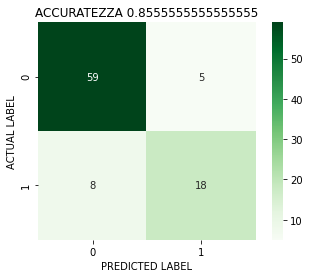

In [127]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

random_forest=RandomForestClassifier(n_estimators=500)

random_forest.fit(X_train,y_train)
predictions_random_forest = random_forest.predict(X_test)
score_random_forest = random_forest.score(X_test,y_test)

cm = confusion_matrix(y_test, predictions_random_forest)
sns.heatmap(cm,annot=True,square=True,cmap='Greens')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')
plt.title(f'ACCURATEZZA {score_random_forest}')

Text(0.5, 1.0, 'ACCURATEZZA 0.7888888888888889')

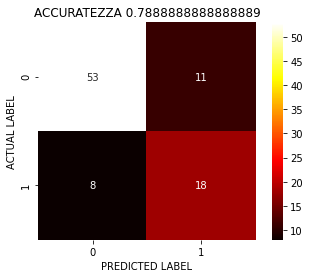

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

decision_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
decision_tree = decision_tree.fit(X_train,y_train)

#Predict the response for test dataset
predictions_decision_tree = decision_tree.predict(X_test)
score_decision_tree = decision_tree.score(X_test,y_test)

cm = confusion_matrix(y_test, predictions_decision_tree)
sns.heatmap(cm,annot=True,square=True,cmap='hot')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')
plt.title(f'ACCURATEZZA {score_decision_tree}')

In [ ]:
text_representation = tree.export_text(decision_tree)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_=decision_tree.plot_tree(decision_tree, 
                   feature_names=y,  
                   class_names="DEATH_EVENT",filled=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.
